# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [ ]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2025.git
    !mv cv_course_2025/seminars/seminar_02/data .

Cloning into 'cv_course_2025'...
remote: Enumerating objects: 38, done.
remote: Total 38 (delta 0), reused 0 (delta 0), pack-reused 38 (from 1)
Receiving objects: 100% (38/38), 10.64 MiB | 11.77 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [ ]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

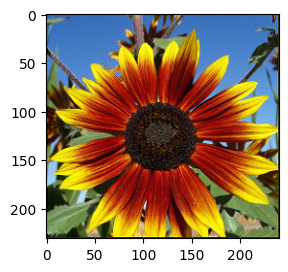

In [ ]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

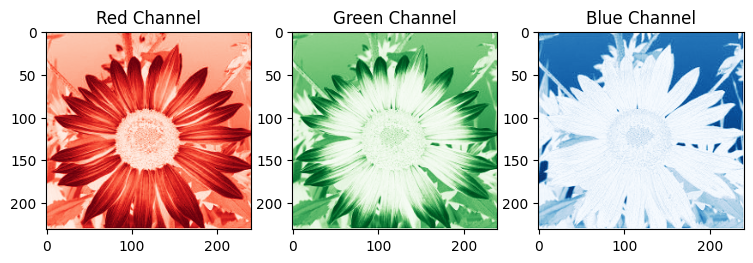

In [ ]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

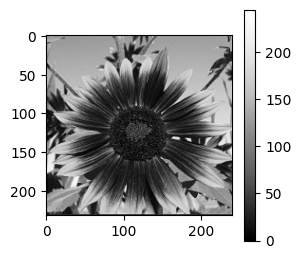

In [ ]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:**

Да, можно, получается, что вклад каждого из каналов в итоговый цвет одинаковый, поэтому не будет видно какого то оттенка, только серый цвет.


## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:**

Эти флаги используются для отображения черно-белого изображения, при `cmap='Greys'` низкие значения изображения отображаются чёрным, высокие - белым, а при `cmap='Greys_r'` палитра инвертируется.

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [ ]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

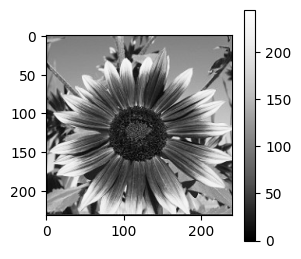

In [ ]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [ ]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [ ]:
def convert_rgb_to_grayscale(img_rgb):
    gr = img_rgb[:,:, 0]*0.299 + img_rgb[:,:, 1]*0.587 + img_rgb[:,:, 2]*0.114
    return np.round(gr).astype(np.uint8)

In [ ]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

AssertionError: 

In [ ]:
np.count_nonzero((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)) == False)

12

Ответ отличается значениями только для 12 пикселей


Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [ ]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

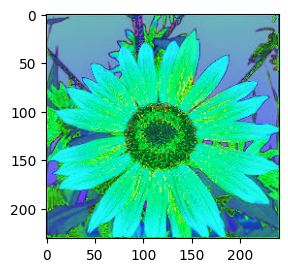

In [ ]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

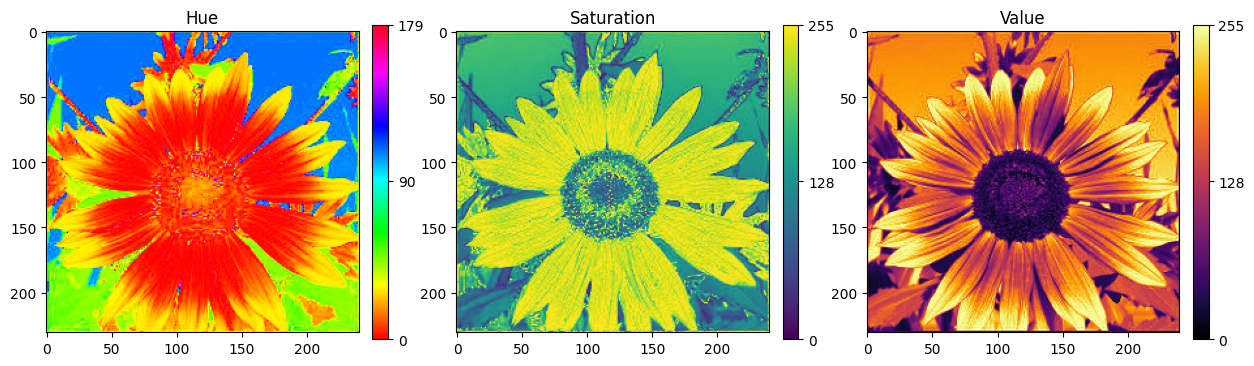

In [ ]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

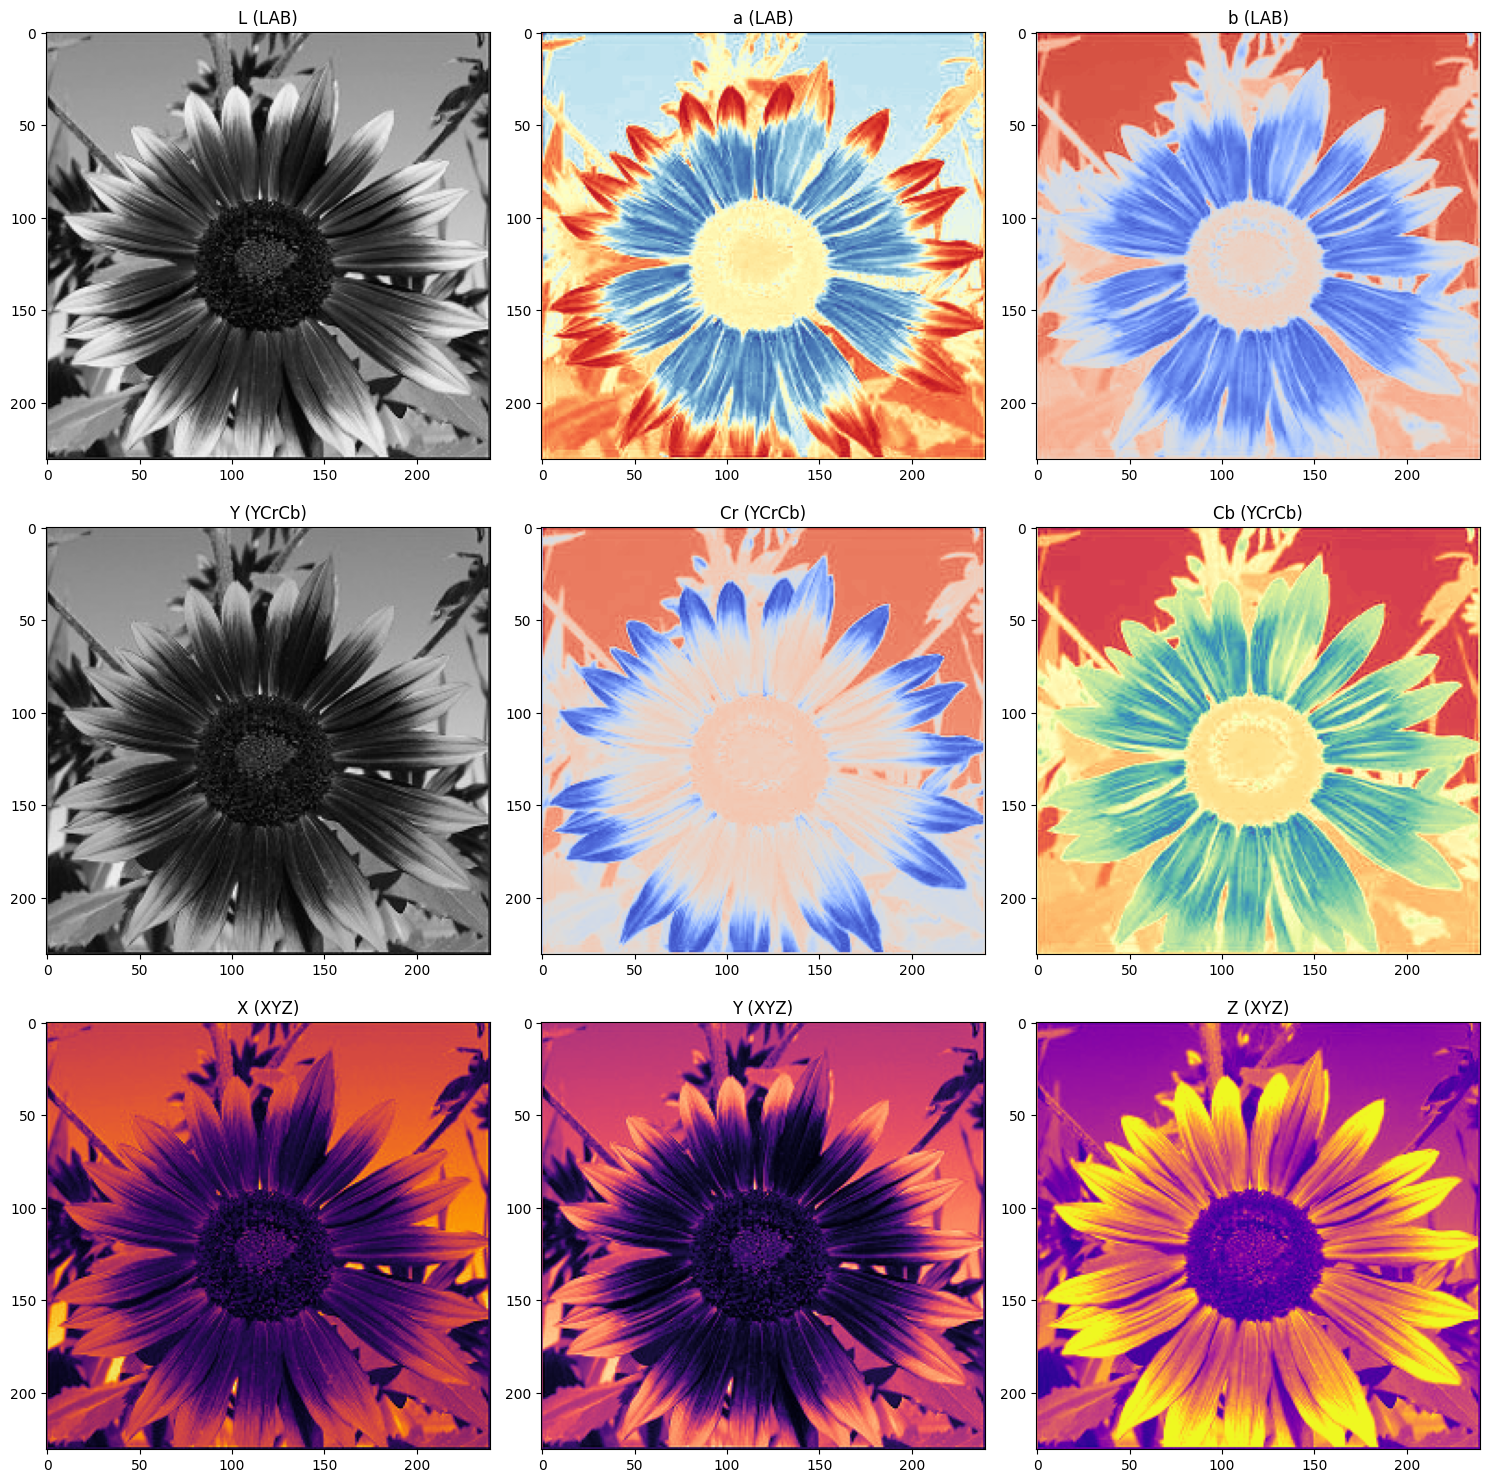

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
img_xyz = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2XYZ)

l, a, b = cv2.split(img_lab)
y, cr, cb = cv2.split(img_ycrcb)
x, y_, z = cv2.split(img_xyz)

fig, axs = plt.subplots(3, 3, figsize=[15, 15])

# LAB
im1 = axs[0, 0].imshow(l, cmap="gray")
axs[0, 0].set_title('L (LAB)')
im2 = axs[0, 1].imshow(a, cmap="RdYlBu")
axs[0, 1].set_title('a (LAB)')
im3 = axs[0, 2].imshow(b, cmap="coolwarm")
axs[0, 2].set_title('b (LAB)')

# YCrCb
im4 = axs[1, 0].imshow(y, cmap="gray")
axs[1, 0].set_title('Y (YCrCb)')
im5 = axs[1, 1].imshow(cr, cmap="coolwarm")
axs[1, 1].set_title('Cr (YCrCb)')
im6 = axs[1, 2].imshow(cb, cmap="Spectral")
axs[1, 2].set_title('Cb (YCrCb)')

# XYZ
im7 = axs[2, 0].imshow(x, cmap="inferno")
axs[2, 0].set_title('X (XYZ)')
im8 = axs[2, 1].imshow(y_, cmap="magma")
axs[2, 1].set_title('Y (XYZ)')
im9 = axs[2, 2].imshow(z, cmap="plasma")
axs[2, 2].set_title('Z (XYZ)')

plt.tight_layout()
plt.show()


## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**

В задачах, где не важен цвет изображения, он может только мешать


# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v]
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [ ]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [ ]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [ ]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

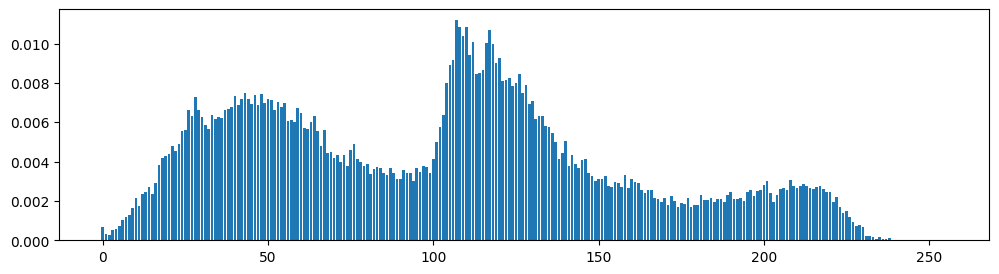

In [ ]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [ ]:
def compute_hist(img):
    H, W = img.shape
    hist = np.zeros(256, dtype=int)

    for x in range(H):
        for y in range(W):
            intensity = img[x, y]
            hist[intensity] += 1

    return hist

In [ ]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

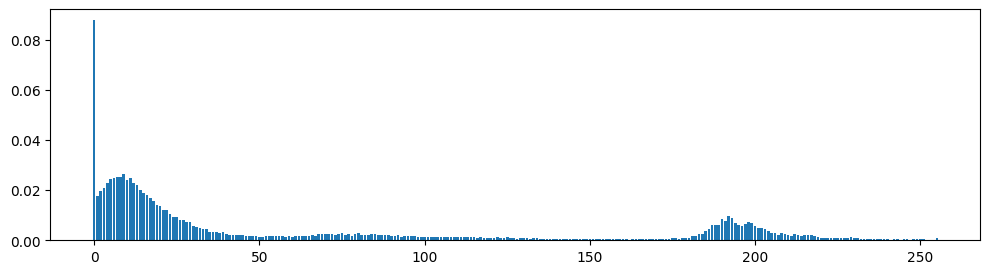

In [ ]:
visualize_hist(hist_r)

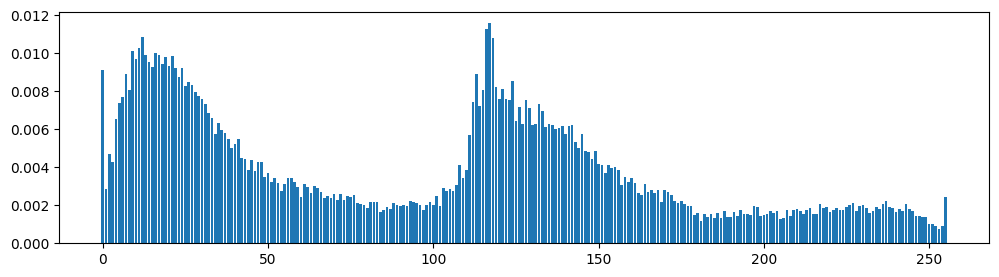

In [ ]:
visualize_hist(hist_g)

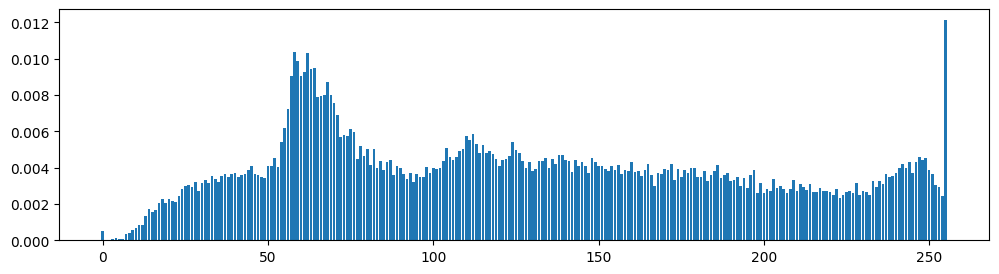

In [ ]:
visualize_hist(hist_b)

In [ ]:
assert((hist_gray == hist_cv).all())

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:**

Гистограмма позволяет оценить яркость/затемнённость изображения, контрастность, наличие шума

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:**

При смене освещения на более яркое, гистограмма смещается вправо, на более тёмное - влево. При смене сцены гистограмма вероятнее всего сильно изменится. При смене камеры гистограмма может немного измениться, так как камеры по-разному захватывают свет.



## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

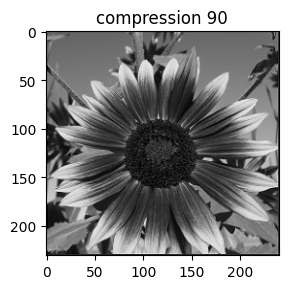

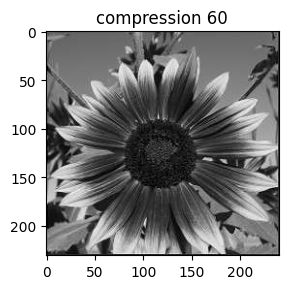

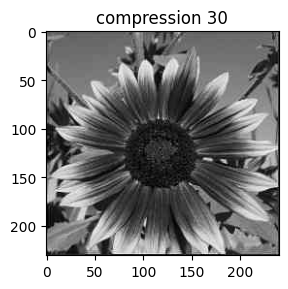

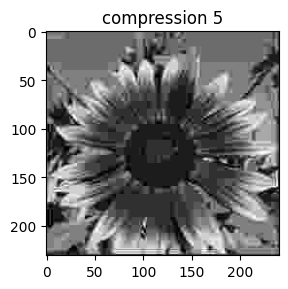

In [ ]:
qualities = [90, 60, 30, 5]

for quality in qualities:
    _, jpeg = cv2.imencode(".jpg", img_gray, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    jpeg= cv2.imdecode(jpeg, 1)

    plt.figure(figsize=[3, 3])
    plt.title(f"compression {quality}")
    plt.imshow(jpeg)

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

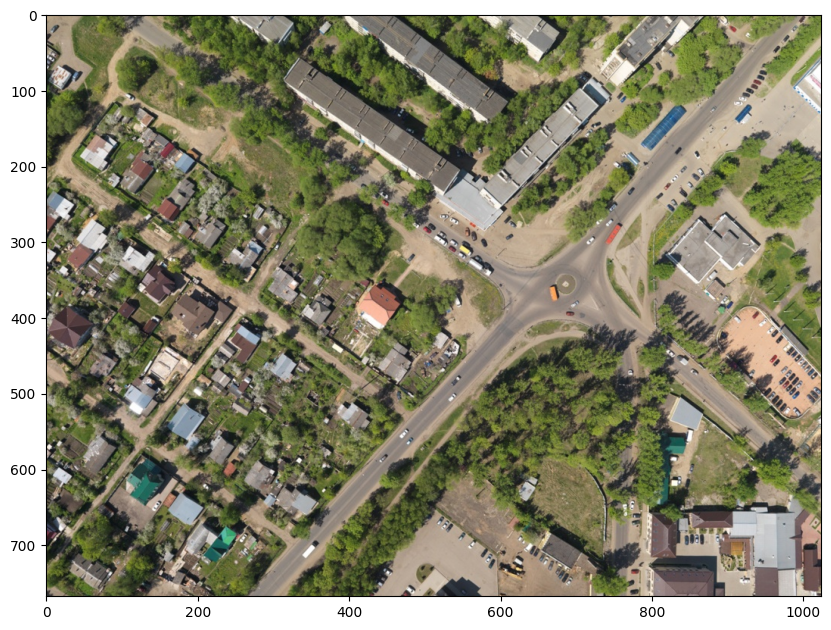

In [ ]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

In [ ]:
aerial_image.shape

(768, 1024, 3)

Доля зелёных насаждений: 31.77%


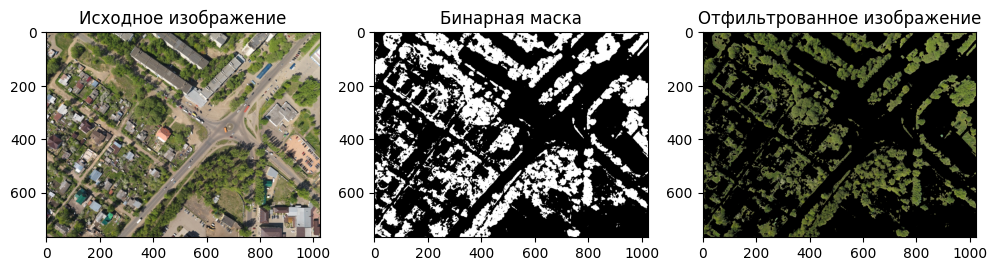

In [ ]:
hsv = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)
lower_green = np.array([30, 50, 50])
upper_green = np.array([70, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)
green_ratio = np.sum(mask > 0) / mask.size
print(f"Доля зелёных насаждений: {green_ratio:.2%}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(aerial_image)
plt.title("Исходное изображение")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Бинарная маска")

plt.subplot(1, 3, 3)
result = cv2.bitwise_and(aerial_image, aerial_image, mask=mask)
plt.imshow(result)
plt.title("Отфильтрованное изображение")

plt.show()

# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [ ]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img
        h, w = img.shape
        self.integral = np.zeros((h + 1, w + 1), dtype=np.int32)

        for i in range(1, h + 1):
            for j in range(1, w + 1):
                self.integral[i, j] = (
                    img[i - 1, j - 1]
                    + self.integral[i - 1, j]
                    + self.integral[i, j - 1]
                    - self.integral[i - 1, j - 1]
                )


    def sum(self, x, y, w, h):
        x2, y2 = x + w, y + h
        return (self.integral[y2, x2] - self.integral[y, x2] - self.integral[y2, x] + self.integral[y, x])


In [ ]:
I = IntegralImage(img_gray)

In [ ]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:**

В задачах детекции объектов

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:**

Динамическому методу